# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
#My Final Proj Start Here

In [2]:
#Import the Lib
library('tidyverse')
library('scales')
library('ggrepel')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [3]:
#The dataset updates daily, the latest record should be yesterday of the date you run it
#Read the national level COVID cases Data
covid_us = read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', col_types=cols())

In [4]:
#covid infected cases
covid_us_i = covid_us |> 
            select(-c(deaths)) |>
            mutate(type='Infection')
#covid death cases
covid_us_d = covid_us |> 
            select(date, deaths) |> 
            mutate(cases = deaths,type='Deaths') |>
            select(date, cases, type)
#Combine two dataset
covid_us_sorted = bind_rows(covid_us_i, covid_us_d)

In [5]:
#Dataset for Labeling
yesterday = covid_us_sorted |> tail(1) |> pull(date)
yes_inf = covid_us_i |> tail(1) |> pull(cases)
yes_dth = covid_us_d |> tail(1) |> pull(cases)
half_inf = yes_inf / 2
half_dth = yes_dth / 2
yesterday_names = data.frame(
    date = c(yesterday, yesterday),
    cases = c(half_inf, half_dth),
    type = factor(c("Infection","Deaths"), levels = c("Infection", "Deaths"))
)

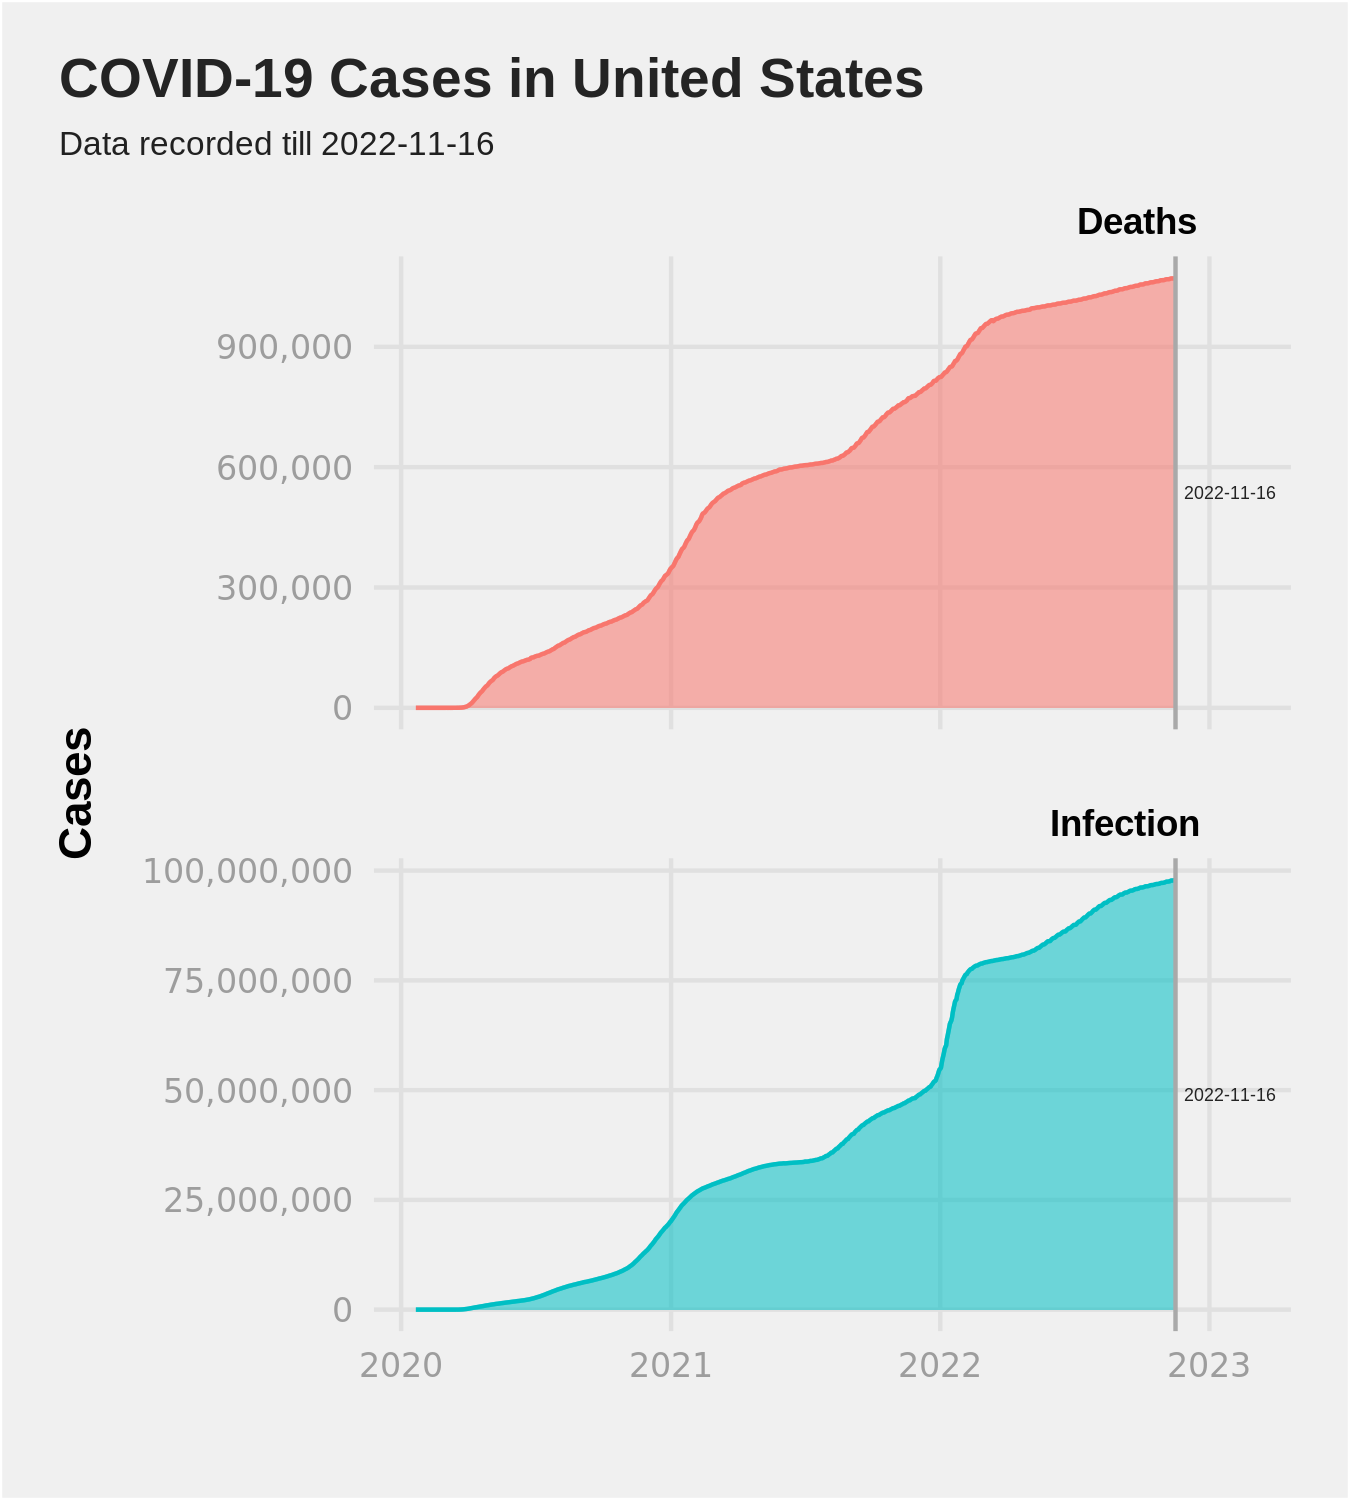

In [6]:
#Plotting Code
options(repr.plot.width = 4.5, repr.plot.height = 5)
bg = '#f0f0f0'
yesterday = covid_us_sorted |> tail(1) |> pull(date)
p = ggplot(covid_us_sorted, aes(x=date, y=cases, color=type)) + geom_line(alpha = 0.5) + geom_area(aes(fill=type, alpha = 0.15)) +
        geom_vline(xintercept = yesterday, color = 'darkgrey') +
        geom_text_repel(data = yesterday_names, 
                    color = '#242424', 
                    aes(label = as.character(date)),
                    nudge_x = 100,
                    size = 1.5,
                    segment.curvature = -0.1,
                    segment.ncp = 3,
                    segment.angle = 30) +
        facet_wrap(~type, ncol = 1, scales='free_y') + 
        scale_y_continuous(labels = comma) + 
        theme(legend.position = 'None',
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.subtitle = element_text(color = '#212121', size = 8),
          plot.title = element_text(color = '#242424', face = 'bold'),
          strip.text = element_text(hjust = 0.9, color = '#010101', face = 'bold'),
          plot.title.position = 'plot',
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          strip.background = element_blank(),
          strip.placement = 'inside',
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank(),
          panel.spacing = unit(0.5, "cm"),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8)) + 
        labs(title = 'COVID-19 Cases in United States', 
             subtitle = paste('Data recorded till', as.character(yesterday)),
             y = 'Cases', x = '')
p

The pandamic in United States start from the beginning of 2020, and then both infection and death figure keep increasing. Until data collected yesterday, We have almost reached the 100,000,000 infections. However, what we could observe from this comparison graph is the delayed pattern of deaths compared to infections, which makes sense as COVID death is an event that happened after infection. A special case is the pattern at the beginning of 2022, where we could see an obviously unproportional increase of infection while not a comparable increase in deaths.

In [7]:
#Read the Data for Covid in United States in average per day
us_avg = read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', col_types=cols())
#Data Manipulation
us_avg_i = us_avg |> 
           mutate(cases_avg_p100k = cases_avg_per_100k, type = 'Infection') |>
           select(date, cases_avg_p100k, type)
us_avg_d = us_avg |> 
           mutate(cases_avg_p100k = deaths_avg_per_100k, type = 'Deaths') |>
           select(date, cases_avg_p100k, type)
us_avg_sorted = bind_rows(us_avg_i, us_avg_d)

In [8]:
#Dataset for setting the Geom_Text
us_avg_i_m = us_avg_i |> 
            filter(cases_avg_p100k == max(cases_avg_p100k))

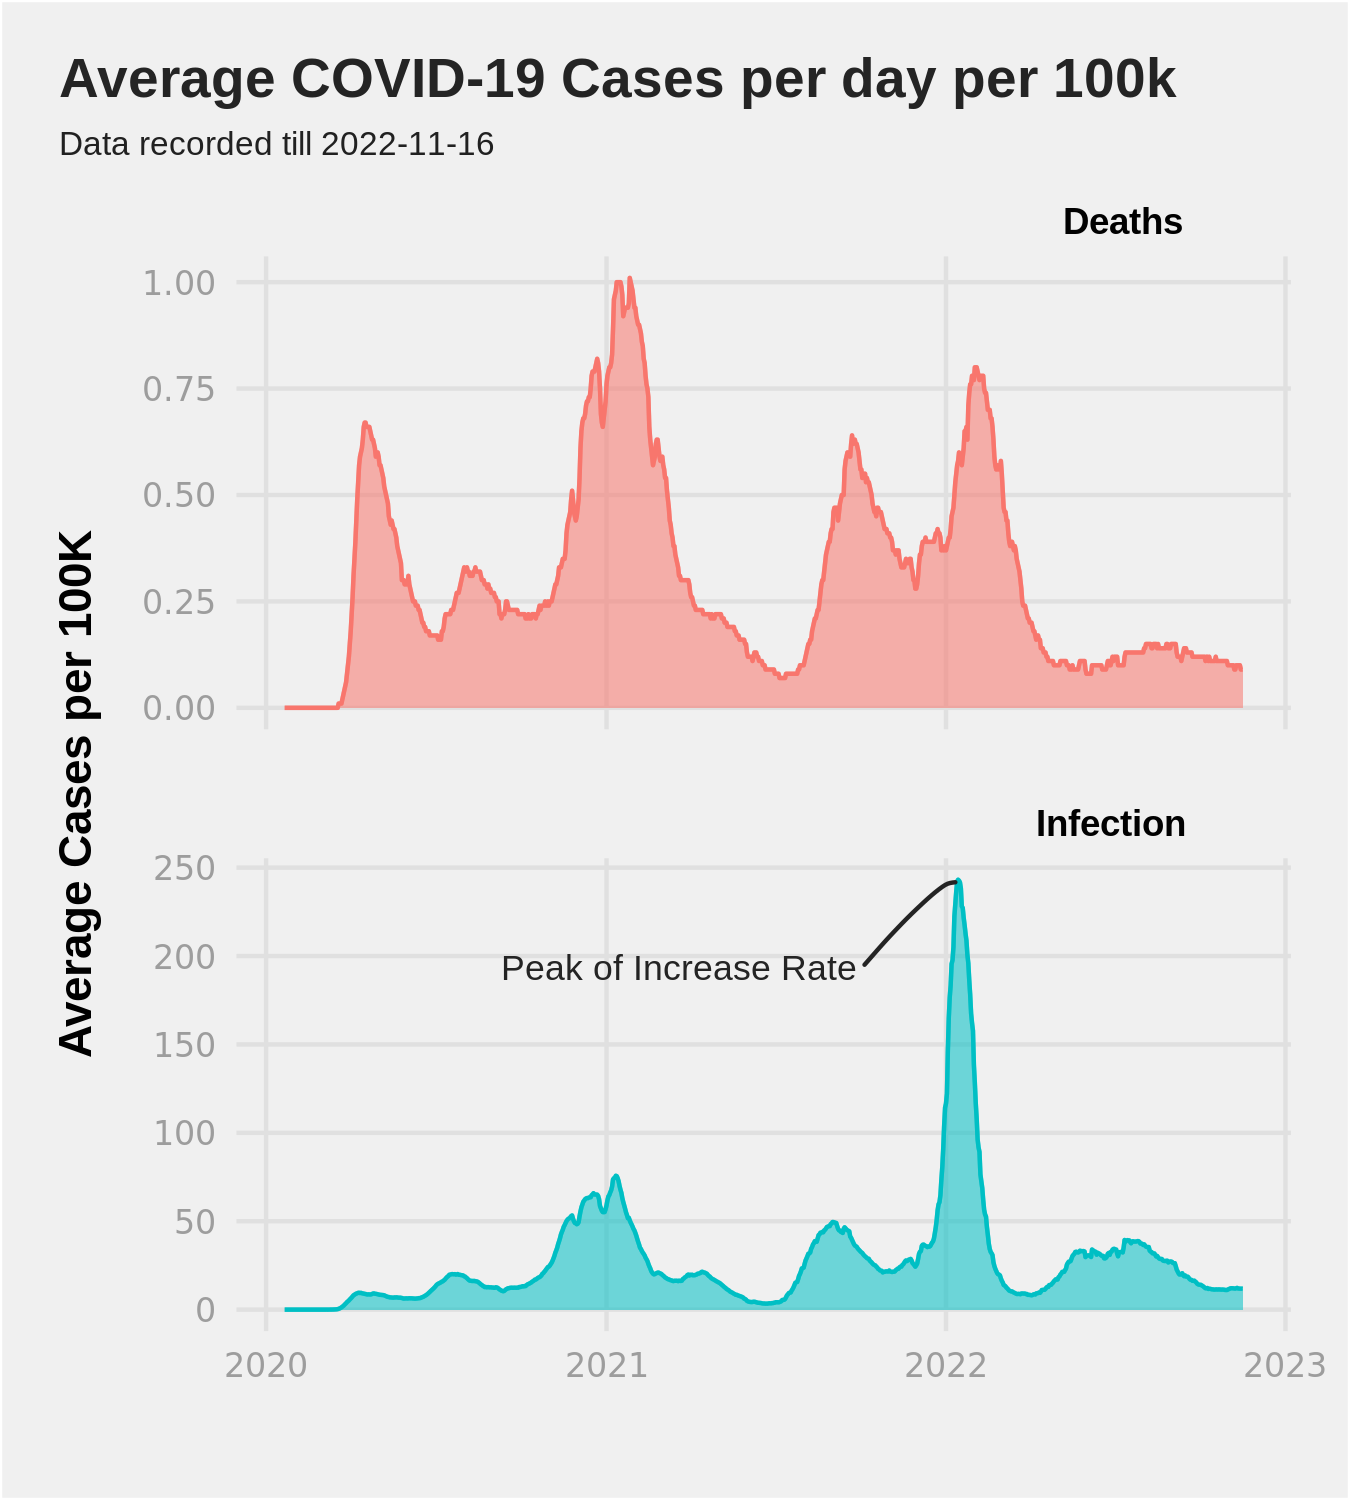

In [9]:
#Plotting Code
options(repr.plot.width = 4.5, repr.plot.height = 5)
bg = '#f0f0f0'
yesterday = us_avg_sorted |> tail(1) |> pull(date)
p = ggplot(us_avg_sorted, aes(x=date, y=cases_avg_p100k, color=type)) + geom_line(alpha = 0.5) + 
        geom_area(aes(fill=type, alpha = 0.15)) +
        facet_wrap(~type, ncol = 1, scales='free_y') + 
        geom_text_repel(data = us_avg_i_m,
                        color = '#242424',
                        aes(label = "Peak of Increase Rate"),
                        nudge_x = -300,
                        nudge_y = -50,
                        size = 3,
                        segment.curvature = -0.1,
                        segment.ncp = 3,
                        segment.angle = 30) + 
        theme(legend.position = 'None',
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
          plot.subtitle = element_text(color = '#212121', size = 8),
          plot.title = element_text(color = '#242424', face = 'bold'),
          strip.text = element_text(hjust = 0.9, color = '#010101', face = 'bold'),
          plot.title.position = 'plot',
          plot.background = element_rect(fill = bg),
          panel.background = element_rect(fill = bg),
          strip.background = element_blank(),
          strip.placement = 'inside',
          panel.grid.major = element_line(color = '#e0e0e0'),
          panel.grid.minor = element_blank(),
          panel.spacing = unit(0.5, "cm"),
          axis.ticks = element_blank(),
          axis.title.y = element_text(face = 'bold', margin = margin(r = 10)),
          axis.text = element_text(color = '#9d9d9d', family = 'DecimaMonoPro', size = 8)) + 
        labs(title = 'Average COVID-19 Cases per day per 100k', 
             subtitle = paste('Data recorded till', as.character(yesterday)), y = 'Average Cases per 100K', x = '')
p

When we take a further look at this graph for the average cases per 100k people, the patterns of increase could be better illustrated. By using average cases, we could have a better view of how fast the virus is infecting people / causing death. From the graph, there're two main local peaks, one at 2021 and one at 2022. However, despite at a much higher amount of infection, the peak of 2022, does not follow with a peak of deaths as high as the one following the 2021 peak. This matches my speculation.

In [10]:
#Read Data for State Level COVID cases
covid_st = read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', col_types=cols())

In [11]:
#Only Including `States` of United States 
covid_st_yt = covid_st |> 
            filter(state != 'American Samoa' & state != 'Puerto Rico' & state != 'Virgin Islands' & state != 'Northern Mariana Islands' & state!= 'District of Columbia') |>
            group_by(state) |> 
            summarize(cases_now = max(cases), deaths_now = max(deaths)) |>
            ungroup() |> 
            slice_max(cases_now, n=5)
covid_st_yt 


state,cases_now,deaths_now
<chr>,<dbl>,<dbl>
California,11421037,97192
Texas,7964352,91548
Florida,7172457,82541
New York,6309897,72820
Illinois,3852801,40174


We could also find data at state level. As shown in the table above, the five states with the most cases recorded till yesterday are:
- California
- Texas
- Florida
- New York
- Illinois 

This might due to their giant population as those states accomondate metropolis including `San Francisco`, `Los Angeles`, `Miami`,`New York City`, and `Chicago`.